Loading required package: boot

Attaching package: ‘boot’

The following object is masked from ‘package:car’:

    logit


Attaching package: ‘psych’

The following object is masked from ‘package:boot’:

    logit

The following object is masked from ‘package:ggplot2’:

    %+%

The following object is masked from ‘package:car’:

    logit

Loading required package: splines
Loading required package: RcmdrMisc
Loading required package: sandwich
The Commander GUI is launched only in interactive sessions


    ticknumb       gender         day1            day2             day3       
 Min.   :2111   Female:495   Min.   :0.020   Min.   :0.0000   Min.   :0.0200  
 1st Qu.:3096   Male  :315   1st Qu.:1.312   1st Qu.:0.4100   1st Qu.:0.4400  
 Median :3620                Median :1.790   Median :0.7900   Median :0.7600  
 Mean   :3616                Mean   :1.771   Mean   :0.9609   Mean   :0.9765  
 3rd Qu.:4155                3rd Qu.:2.230   3rd Qu.:1.3500   3rd Qu.:1.5250  
 Max.   :4765                Max.   :3.690   Max.   :3.4400   Max.   :3.4100  
                                             NA's   :546      NA's   :687     

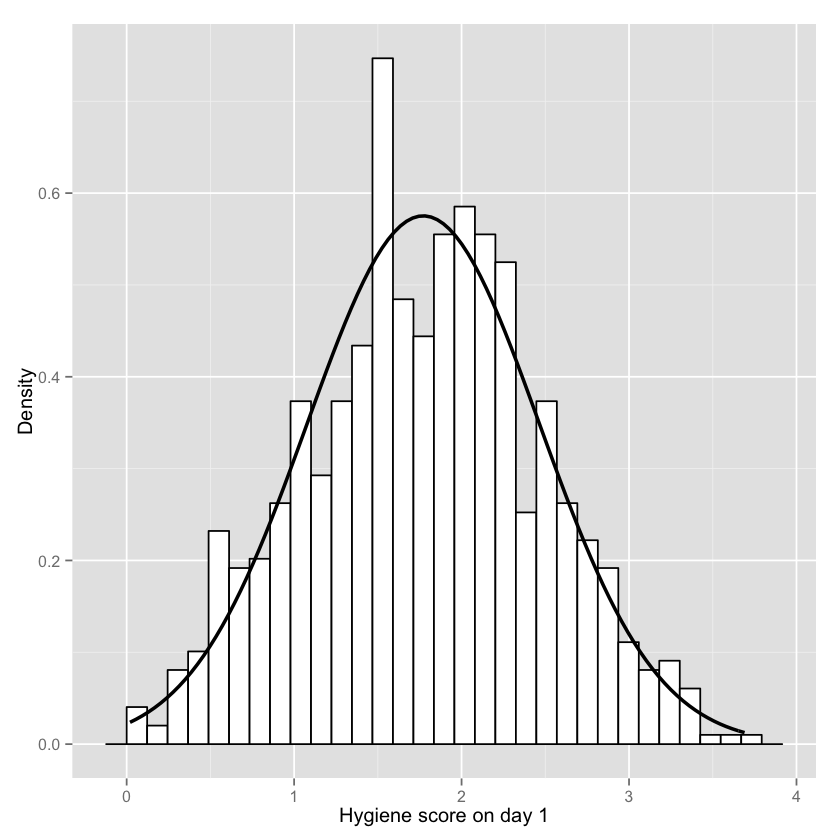

In [1]:
# Exercies for DSUR Ch. 5
rm(list=ls())
setwd("~/Documents/mids/w203")

library(car)
library(ggplot2)
library(pastecs)
library(psych)
library(Rcmdr)

dlf = read.delim("DownloadFestival(No Outlier).dat", header = T)
summary(dlf)

###################################################################
# Inspect the Normal Distribution assumption using a ggplot2

# Get a density plot
hist.day1 = ggplot(dlf, aes(day1))
hist.day1 + geom_histogram(aes(y=..density..), colour="black", fill="white") +
  labs(x = "Hygiene score on day 1", y = "Density") +
  theme(legend.position = "none") +
  # Add a normal distribution layer on top of our density plot
  stat_function(fun = dnorm, 
                  args = list(mean = mean(dlf$day1, na.rm = T),
                            sd = sd(dlf$day1, na.rm = T)),
                  color = "black", size = 1)

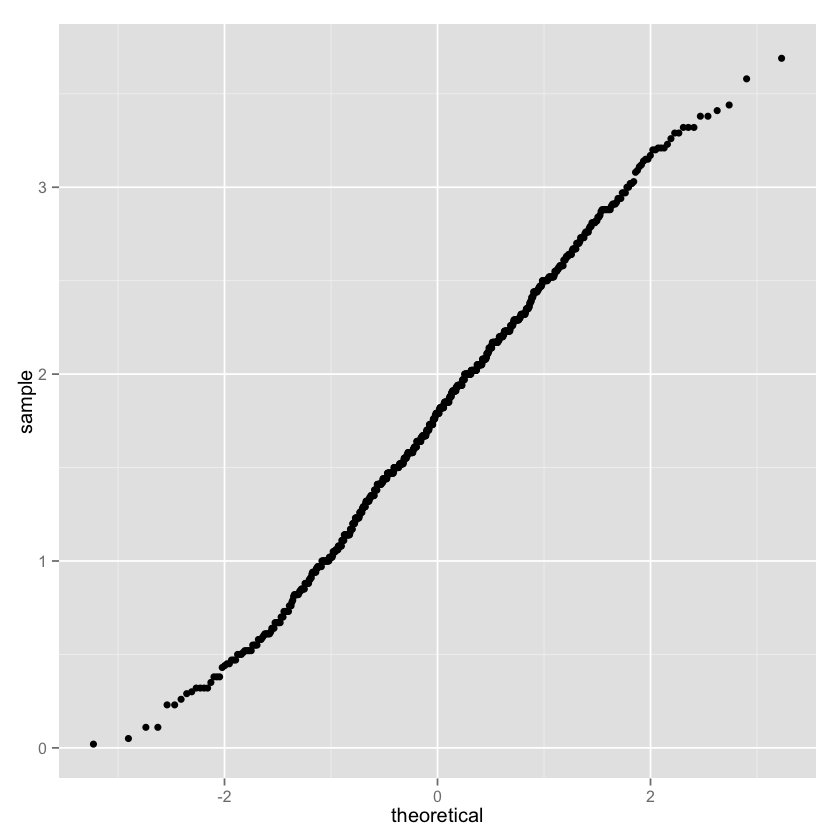

In [2]:
# Inspect the Normal Distribution assumption using a Q-Q plot
qqplot.day1 = qplot(sample = dlf$day1, stat="qq")
qqplot.day1

In [5]:
############################
# Data summmary

# From the psych library
describe(dlf$day1)

# From the pastecs library()
stat.desc(dlf$day1, basic=F, norm = T)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
1,1,810,1.771135802,0.6935389219,1.79,1.771929012,0.696822,0.02,3.69,3.67,-0.004428350332,-0.4215940518,0.02436847377


median            mean         SE.mean    CI.mean.0.95             var 
 1.790000000000  1.771135802469  0.024368473768  0.047832893049  0.480996236170 
        std.dev        coef.var        skewness        skew.2SE        kurtosis 
 0.693538921886  0.391578624812 -0.004428350332 -0.025773948731 -0.421594051797 
       kurt.2SE      normtest.W      normtest.p 
-1.228384569040  0.995915217562  0.031984819121

In [7]:
# describe multiple variables at the same time, so that we can compare them side by side
describe(cbind(dlf$day1, dlf$day2, dlf$day3))
stat.desc(cbind(dlf$day1, dlf$day2, dlf$day3), basic=F, norm = T)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
1,1,810,1.771135802,0.6935389219,1.79,1.771929012,0.696822,0.02,3.69,3.67,-0.004428350332,-0.4215940518,0.02436847377
2,2,264,0.9609090909,0.7207800533,0.79,0.8687264151,0.607866,0,3.44,3.44,1.082811208,0.7554615277,0.04436094571
3,3,123,0.976504065,0.7102769995,0.76,0.9021212121,0.607866,0.02,3.41,3.39,1.007812735,0.5945454165,0.06404352026


,V1,V2,V3
median,1.79,0.79,0.76
mean,1.771135802,0.9609090909,0.976504065
SE.mean,0.02436847377,0.04436094571,0.06404352026
CI.mean.0.95,0.04783289305,0.08734780998,0.1267805449
var,0.4809962362,0.5195238852,0.504493416
std.dev,0.6935389219,0.7207800533,0.7102769995
coef.var,0.3915786248,0.7501022314,0.7273671712
skewness,-0.004428350332,1.082811208,1.007812735
skew.2SE,-0.02577394873,3.61157383,2.309035183
kurtosis,-0.4215940518,0.7554615277,0.5945454165


In [8]:
# To avoid seeing too many decimals, use the round function :-)
round(stat.desc(cbind(dlf$day1, dlf$day2, dlf$day3), basic=F, norm = T), digits = 3)

,V1,V2,V3
median,1.79,0.79,0.76
mean,1.771,0.961,0.977
SE.mean,0.024,0.044,0.064
CI.mean.0.95,0.048,0.087,0.127
var,0.481,0.52,0.504
std.dev,0.694,0.721,0.71
coef.var,0.392,0.75,0.727
skewness,-0.004,1.083,1.008
skew.2SE,-0.026,3.612,2.309
kurtosis,-0.422,0.755,0.595


,exam,computer,lectures,numeracy,uni
median,60,51.5,62,4,0.5
mean,58.1,50.71,59.765,4.85,0.5
SE.mean,2.131557026,0.8260035219,2.16847774,0.2705680519,0.05025189076
CI.mean.0.95,4.229471584,1.63897019,4.30273029,0.5368657151,0.0997106535
var,454.3535354,68.22818182,470.2295707,7.320707071,0.2525252525
std.dev,21.31557026,8.260035219,21.6847774,2.705680519,0.5025189076
coef.var,0.366877285,0.1628876991,0.3628340567,0.557872272,1.005037815
skewness,-0.1038042615,-0.1690671149,-0.4098449401,0.9327151394,0
skew.2SE,-0.2150226956,-0.3502097724,-0.8489628703,1.932049037,0
kurtosis,-1.147658459,0.2208250424,-0.2846356771,0.763492705,-2.0199


[1] 0 0 0 0 0 0

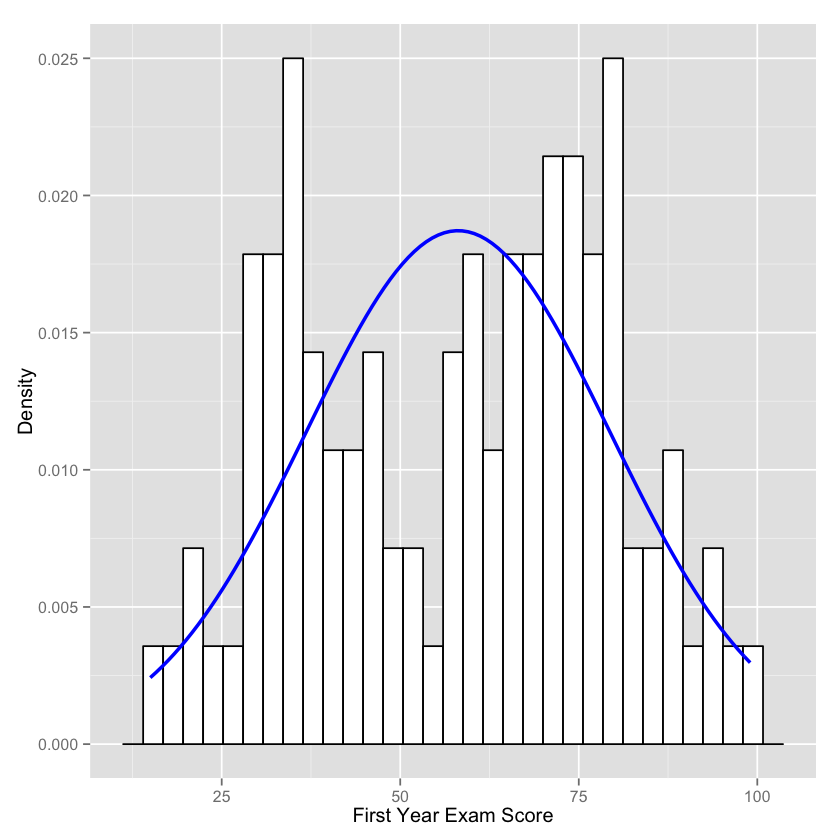

In [9]:
###################################################################

rexam = read.delim("rexam.dat", header=T)
options(scipen=999, digits=10)
stat.desc(rexam, basic=F, norm=T)

head(rexam$uni)
# Let's convert rexam$uni into a factor
rexam$uni = factor(rexam$uni, levels = c(0:1), 
                   labels = c("King's College", "Queen's University"))

hist.exam = ggplot(rexam, aes(exam))
hist.exam + geom_histogram(aes(y=..density..), colour="black", fill="white") +
  labs(x = "First Year Exam Score", y = "Density") +
  theme(legend.position = "none") +
  # Add a normal distribution layer on top of our density plot
  stat_function(fun = dnorm, 
                args = list(mean = mean(rexam$exam, na.rm = T),
                            sd = sd(rexam$exam, na.rm = T)),
                color = "blue", size = 1)

In [11]:
# Get description of the data, grouped by univeristy
by(data = rexam$exam, INDICES = rexam$uni, FUN = describe)

# Plot the exam, by university

kings.data = subset(rexam, uni == "King's College")
queens.data = subset(rexam, uni == "Queen's University")

rexam$uni: King's College
  vars  n  mean    sd median trimmed  mad min max range skew kurtosis   se
1    1 50 40.18 12.59     38   39.85 12.6  15  66    51 0.29    -0.72 1.78
------------------------------------------------------------ 
rexam$uni: Queen's University
  vars  n  mean    sd median trimmed mad min max range skew kurtosis   se
1    1 50 76.02 10.21     75    75.7 8.9  56  99    43 0.26    -0.46 1.44

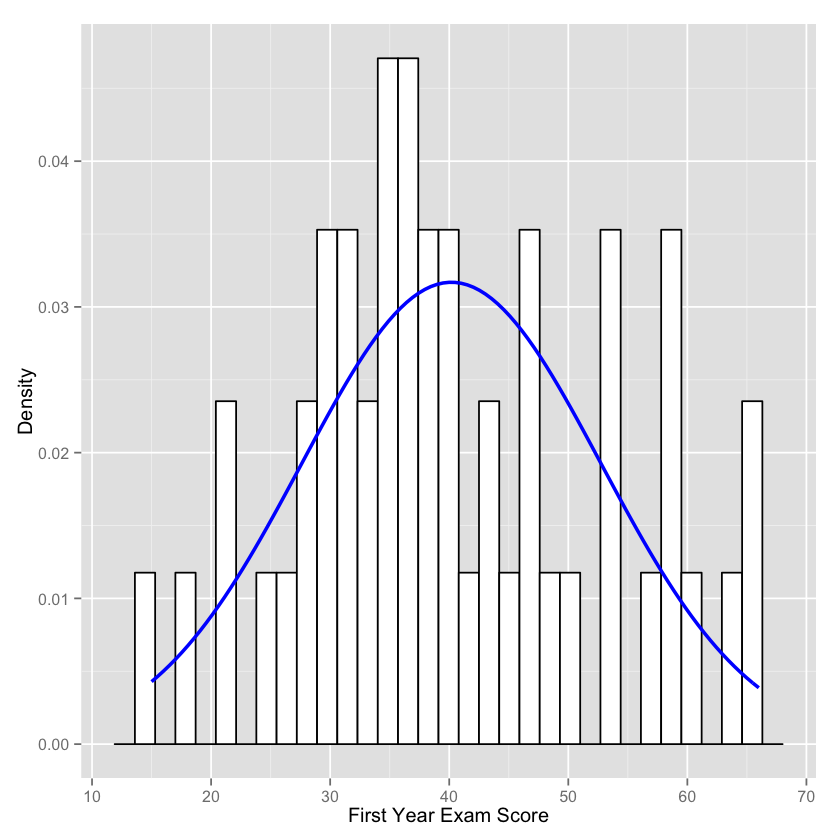

In [12]:
kings.hist.exam = ggplot(kings.data, aes(exam))
kings.hist.exam + geom_histogram(aes(y=..density..), colour="black", fill="white") +
  labs(x = "First Year Exam Score", y = "Density") +
  theme(legend.position = "none") +
  stat_function(fun = dnorm, 
                args = list(mean = mean(kings.data$exam, na.rm = T),
                            sd = sd(kings.data$exam, na.rm = T)), color = "blue", size = 1)

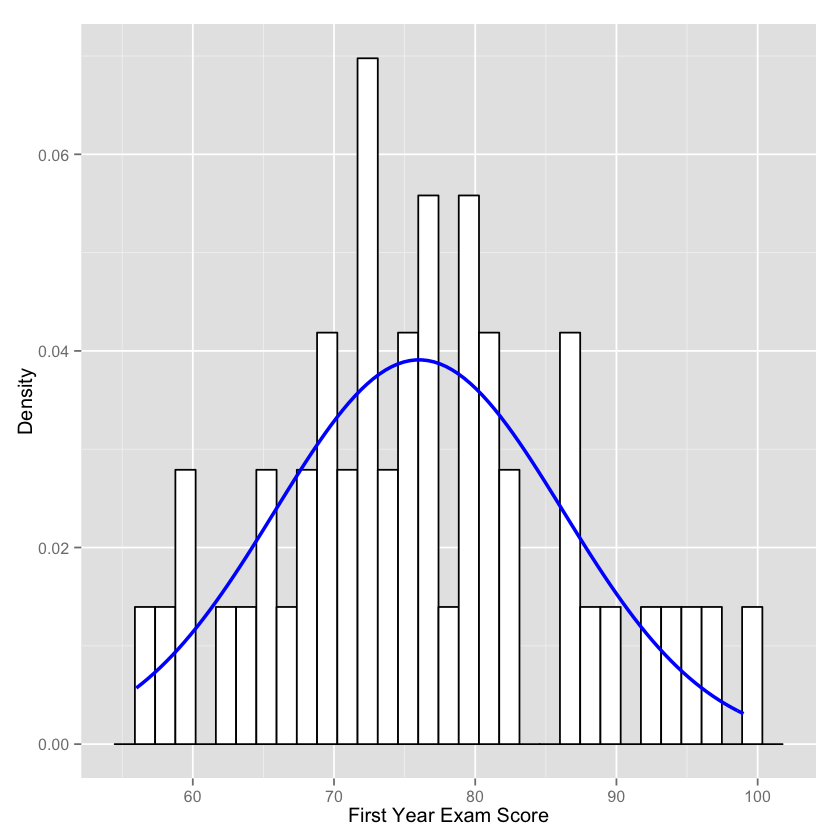

In [13]:
queens.hist.exam = ggplot(queens.data, aes(exam))
queens.hist.exam + geom_histogram(aes(y=..density..), colour="black", fill="white") +
  labs(x = "First Year Exam Score", y = "Density") +
  theme(legend.position = "none") +
  stat_function(fun = dnorm, 
                args = list(mean = mean(queens.data$exam, na.rm = T),
                            sd = sd(queens.data$exam, na.rm = T)), color = "blue", size = 1)

In [14]:
# Shapiro-Wilk test
shapiro.test(rexam$exam)
shapiro.test(queens.data$exam)

# Test for homogeneity of variance by using the Levene's Test.
# If the test is insignificant, it means the variance in different group (e.g. based on uni)
# are similar.
leveneTest(rexam$exam, rexam$uni)


	Shapiro-Wilk normality test

data:  rexam$exam
W = 0.96130949, p-value = 0.004991062



	Shapiro-Wilk normality test

data:  queens.data$exam
W = 0.98371153, p-value = 0.7151182


,Df,F value,Pr(>F)
group,1,2.088557499,0.1515962569
,98,NA,NA
